# Skillbox — Мастер-класс: Разведочный анализ данных + Подготовка отчётов — Kiva.org
***

# 4. Домашнее задание
***

In [1]:
import numpy as np
import pandas as pd
import math
import missingno as msno
from datetime import datetime, timedelta

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.style.use('seaborn-darkgrid')
palette = plt.get_cmap('Set2')

import os

In [2]:
df_kiva_loans = pd.read_csv("../kiva/kiva_loans.csv")
df_mpi = pd.read_csv("../kiva/kiva_mpi_region_locations.csv")

In [3]:
df_kiva_loans.head(5)

,id,funded_amount,loan_amount,activity,sector,use,country_code,country,region,currency,partner_id,posted_time,disbursed_time,funded_time,term_in_months,lender_count,tags,borrower_genders,repayment_interval,date
0,653051,300.0,300.0,Fruits & Vegetables,Food,"To buy seasonal, fresh fruits to sell.",PK,Pakistan,Lahore,PKR,247.0,2014-01-01 06:12:39+00:00,2013-12-17 08:00:00+00:00,2014-01-02 10:06:32+00:00,12.0,12,NaN,female,irregular,2014-01-01
1,653053,575.0,575.0,Rickshaw,Transportation,to repair and maintain the auto rickshaw used ...,PK,Pakistan,Lahore,PKR,247.0,2014-01-01 06:51:08+00:00,2013-12-17 08:00:00+00:00,2014-01-02 09:17:23+00:00,11.0,14,NaN,"female, female",irregular,2014-01-01
2,653068,150.0,150.0,Transportation,Transportation,To repair their old cycle-van and buy another ...,IN,India,Maynaguri,INR,334.0,2014-01-01 09:58:07+00:00,2013-12-17 08:00:00+00:00,2014-01-01 16:01:36+00:00,43.0,6,"user_favorite, user_favorite",female,bullet,2014-01-01
3,653063,200.0,200.0,Embroidery,Arts,to purchase an embroidery machine and a variet...,PK,Pakistan,Lahore,PKR,247.0,2014-01-01 08:03:11+00:00,2013-12-24 08:00:00+00:00,2014-01-01 13:00:00+00:00,11.0,8,NaN,female,irregular,2014-01-01
4,653084,400.0,400.0,Milk Sales,Food,to purchase one buffalo.,PK,Pakistan,Abdul Hakeem,PKR,245.0,2014-01-01 11:53:19+00:00,2013-12-17 08:00:00+00:00,2014-01-01 19:18:51+00:00,14.0,16,NaN,female,monthly,2014-01-01


In [4]:
df_mpi.head()

,LocationName,ISO,country,region,world_region,MPI,geo,lat,lon
0,"Badakhshan, Afghanistan",AFG,Afghanistan,Badakhshan,South Asia,0.387,"(36.7347725, 70.81199529999999)",36.734772,70.811995
1,"Badghis, Afghanistan",AFG,Afghanistan,Badghis,South Asia,0.466,"(35.1671339, 63.7695384)",35.167134,63.769538
2,"Baghlan, Afghanistan",AFG,Afghanistan,Baghlan,South Asia,0.300,"(35.8042947, 69.2877535)",35.804295,69.287754
3,"Balkh, Afghanistan",AFG,Afghanistan,Balkh,South Asia,0.301,"(36.7550603, 66.8975372)",36.755060,66.897537
4,"Bamyan, Afghanistan",AFG,Afghanistan,Bamyan,South Asia,0.325,"(34.8100067, 67.8212104)",34.810007,67.821210


In [5]:
df_mpi_grouped = df_mpi\
    .groupby(['ISO', 'country', 'world_region'])['MPI']\
    .mean()\
    .fillna(0)\
    .reset_index()

In [6]:
df_kiva_loans = df_kiva_loans.merge(df_mpi_grouped, how='left', on='country')
df_kiva_loans.head()

,id,funded_amount,loan_amount,activity,sector,use,country_code,country,region,currency,...,funded_time,term_in_months,lender_count,tags,borrower_genders,repayment_interval,date,ISO,world_region,MPI
0,653051,300.0,300.0,Fruits & Vegetables,Food,"To buy seasonal, fresh fruits to sell.",PK,Pakistan,Lahore,PKR,...,2014-01-02 10:06:32+00:00,12.0,12,NaN,female,irregular,2014-01-01,PAK,South Asia,0.233167
1,653053,575.0,575.0,Rickshaw,Transportation,to repair and maintain the auto rickshaw used ...,PK,Pakistan,Lahore,PKR,...,2014-01-02 09:17:23+00:00,11.0,14,NaN,"female, female",irregular,2014-01-01,PAK,South Asia,0.233167
2,653068,150.0,150.0,Transportation,Transportation,To repair their old cycle-van and buy another ...,IN,India,Maynaguri,INR,...,2014-01-01 16:01:36+00:00,43.0,6,"user_favorite, user_favorite",female,bullet,2014-01-01,IND,South Asia,0.000000
3,653063,200.0,200.0,Embroidery,Arts,to purchase an embroidery machine and a variet...,PK,Pakistan,Lahore,PKR,...,2014-01-01 13:00:00+00:00,11.0,8,NaN,female,irregular,2014-01-01,PAK,South Asia,0.233167
4,653084,400.0,400.0,Milk Sales,Food,to purchase one buffalo.,PK,Pakistan,Abdul Hakeem,PKR,...,2014-01-01 19:18:51+00:00,14.0,16,NaN,female,monthly,2014-01-01,PAK,South Asia,0.233167


In [7]:
countries = df_kiva_loans['country'].value_counts()[df_kiva_loans['country'].value_counts(normalize=True)> 0.005]

In [8]:
df_kiva_loans['borrower_genders'] = [elem if elem in ['female','male'] else 'group' for elem in df_kiva_loans['borrower_genders'] ]


## 4.1. Самостоятельная работа
***

- А в каких странах преобладают мужчины? Группа людей? (п. 2.2.2.)
- Изучите несколько займов с очень большими суммами. Что можно сказать о назначении этих заявок? В каких странах они оформлены? Каков гендерный состав заявителей? (п. 2.4.2.)
- Попробуйте найти связь между странами (регионами), полом заёмщика и суммой заявки. Какие выводы можно сделать из этих данных? (п. 2.4.3.)

### П. 2.2.2
А в каких странах преобладают мужчины?

In [9]:
df_gender_by_country = \
    df_kiva_loans[df_kiva_loans['country'].isin(countries.index.values)]\
    .groupby(['country', 'borrower_genders'])['borrower_genders']\
    .count()\
    .groupby(level=0).apply(lambda x: 100 * x / x.sum())\
    .unstack('borrower_genders')\
    .fillna(0)\
    .sort_values(by='male')[-20:]

df_gender_by_country = df_gender_by_country[['male', 'female', 'group']]

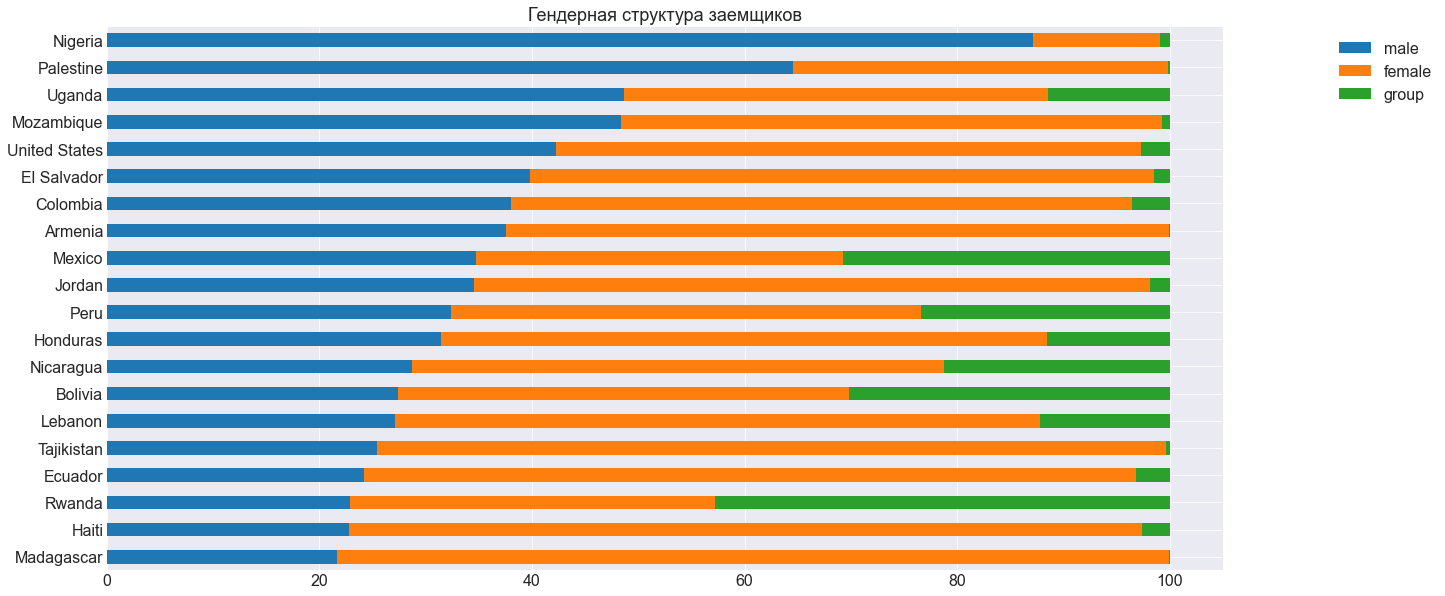

In [10]:
plot = df_gender_by_country.plot.barh(
        figsize=(20,10)
        , fontsize=16
        , stacked=True
        , title='Гендерная структура заемщиков')
plot.title.set_size(18)
plot.legend(loc=1, bbox_to_anchor=(1.2, 1), fontsize=16)
plot.set(ylabel=None, xlabel=None)
plt.show()

Среди заемщиков преобладают мужчины в таких странах как:
* Нигерия
* Палестина
* Уганда

Группы людей?

In [11]:
df_gender_by_country = \
    df_kiva_loans[df_kiva_loans['country'].isin(countries.index.values)]\
    .groupby(['country', 'borrower_genders'])['borrower_genders']\
    .count()\
    .groupby(level=0).apply(lambda x: 100 * x / x.sum())\
    .unstack('borrower_genders')\
    .fillna(0)\
    .sort_values(by='group')[-20:]

df_gender_by_country = df_gender_by_country[['group', 'female', 'male']]

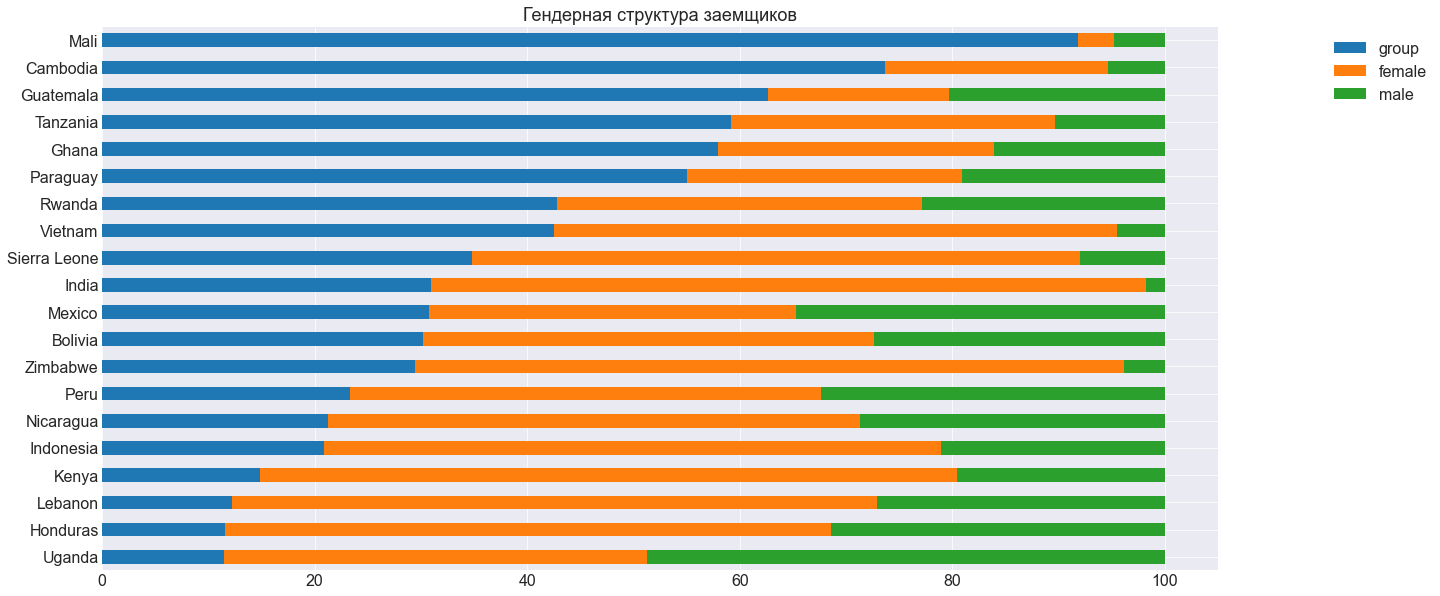

In [12]:
plot = df_gender_by_country.plot.barh(
        figsize=(20,10)
        , fontsize=16
        , stacked=True
        , title='Гендерная структура заемщиков')
plot.title.set_size(18)
plot.legend(loc=1, bbox_to_anchor=(1.2, 1), fontsize=16)
plot.set(ylabel=None, xlabel=None)
plt.show()

В следующих странах преобладают группы заемщиков:
* Мали
* Камбоджа
* Гватемала
* Танзания
* Гана
* Парагвай
* Руанда

### П. 2.4.2

Изучите несколько займов с очень большими суммами. Что можно сказать о назначении этих заявок? В каких странах они оформлены? Каков гендерный состав заявителей?

In [13]:
df_kiva_large_loans = df_kiva_loans[df_kiva_loans['loan_amount'] >= 50000]\
.sort_values('loan_amount', ascending=False)\
[['loan_amount', 'sector', 'use', 'country', 'borrower_genders', 'world_region']]
df_kiva_large_loans['use']

70499     create more than 300 jobs for women and farmer...
34196     to buy and sell Barefoot Power's Solar Lightin...
586970    to generate income to over 600 fishermen in Ta...
538248    to enable 5,000 additional small-holder farmer...
540849                                                  NaN
541006    to bolster logistics of affordable water distr...
544548    to provide community trauma services in South ...
548513    to distribute solar home systems throughout ru...
563074    to provide life-changing clean cookstoves and ...
565733    to pay 600 farming families 100% above market ...
583307    to support 800+ farmers by improving their pro...
604502    to add value and jobs to the local economy by ...
523659    to train & equip 200 rural merchants in Mozamb...
614869    create jobs through environmentally-friendly m...
614922    to set up 13 new clean water businesses in nor...
618264    to provide income opportunities in remote Indo...
621860    to distribute 400 pay-as-you-g

In [14]:
df_kiva_large_loans['use'].dropna().to_csv('large_loans_use.csv')

In [15]:
sectors_of_large_loans = df_kiva_large_loans['sector'].value_counts()

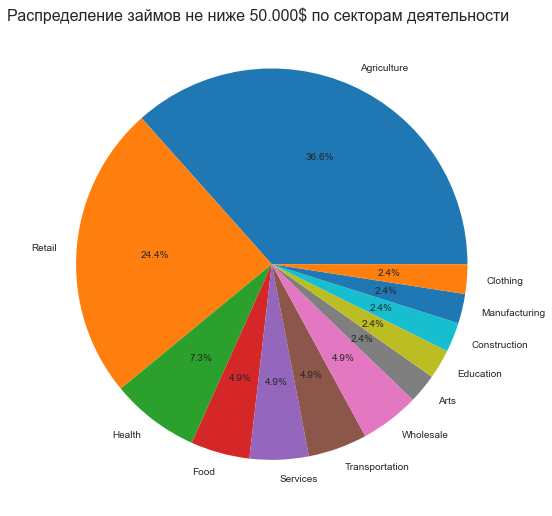

In [16]:
fig ,ax = plt.subplots(figsize=(15,9))
ax = plt.pie(x=sectors_of_large_loans, labels=sectors_of_large_loans.index, autopct='%.1f%%')
fig.suptitle('Распределение займов не ниже 50.000$ по секторам деятельности', y=0.9, fontsize=16)
plt.show()

In [17]:
df_kiva_large_loans['world_region'].fillna(value='Sub-Saharan Africa', inplace=True)

In [18]:
regions_of_large_loans = df_kiva_large_loans['world_region'].value_counts()

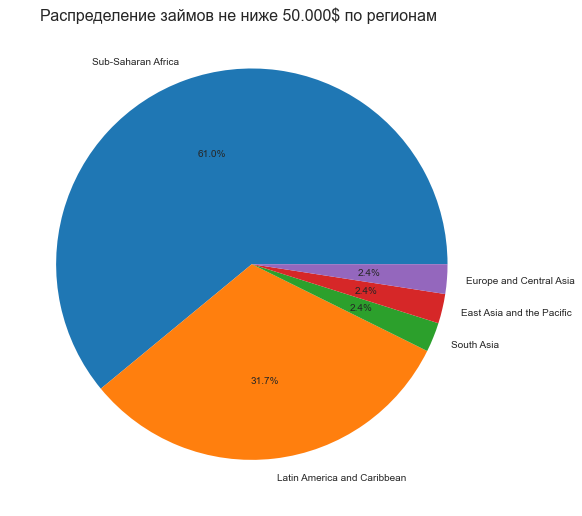

In [19]:
fig, ax = plt.subplots(figsize=(15,9))
ax = plt.pie(x=regions_of_large_loans, labels=regions_of_large_loans.index, autopct='%.1f%%')
fig.suptitle('Распределение займов не ниже 50.000$ по регионам', y=0.9, fontsize=16)
plt.show()

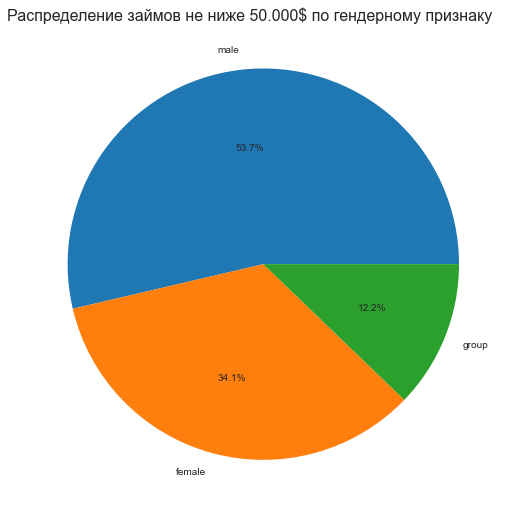

In [20]:
large_loans_by_genders = df_kiva_large_loans['borrower_genders'].value_counts()

fig, ax = plt.subplots(figsize=(15,9))
ax = plt.pie(x=large_loans_by_genders, labels=large_loans_by_genders.index, autopct='%.1f%%')

fig.suptitle('Распределение займов не ниже 50.000$ по гендерному признаку', y=0.9, fontsize=16)
plt.show()

### Вывод по П. 2.4.2:
* Такие крупные суммы нужны заемщикам для создания новых рабочих мест и улучшения условий труда работников
* Основными направлениями развития производства являются сельское хозяйство и розничная торговля
* Подавляющее большинство займов запрошены из стран Латинской Америки и расположенных к югу от пустыни Сахара
* В роли заемщика, как правило, выступает 1 человек. В этом случае количество мужчин преобладает более чем в 1.5 раза

### П. 2.4.3
Попробуйте найти связь между странами (регионами), полом заёмщика и суммой заявки. Какие выводы можно сделать из этих данных? 

In [21]:
world_regions = df_kiva_loans['world_region'].value_counts().index.to_list()


In [22]:
average_loan_by_region_gender = df_kiva_loans.groupby(['world_region', 'borrower_genders']).agg('mean').reset_index()

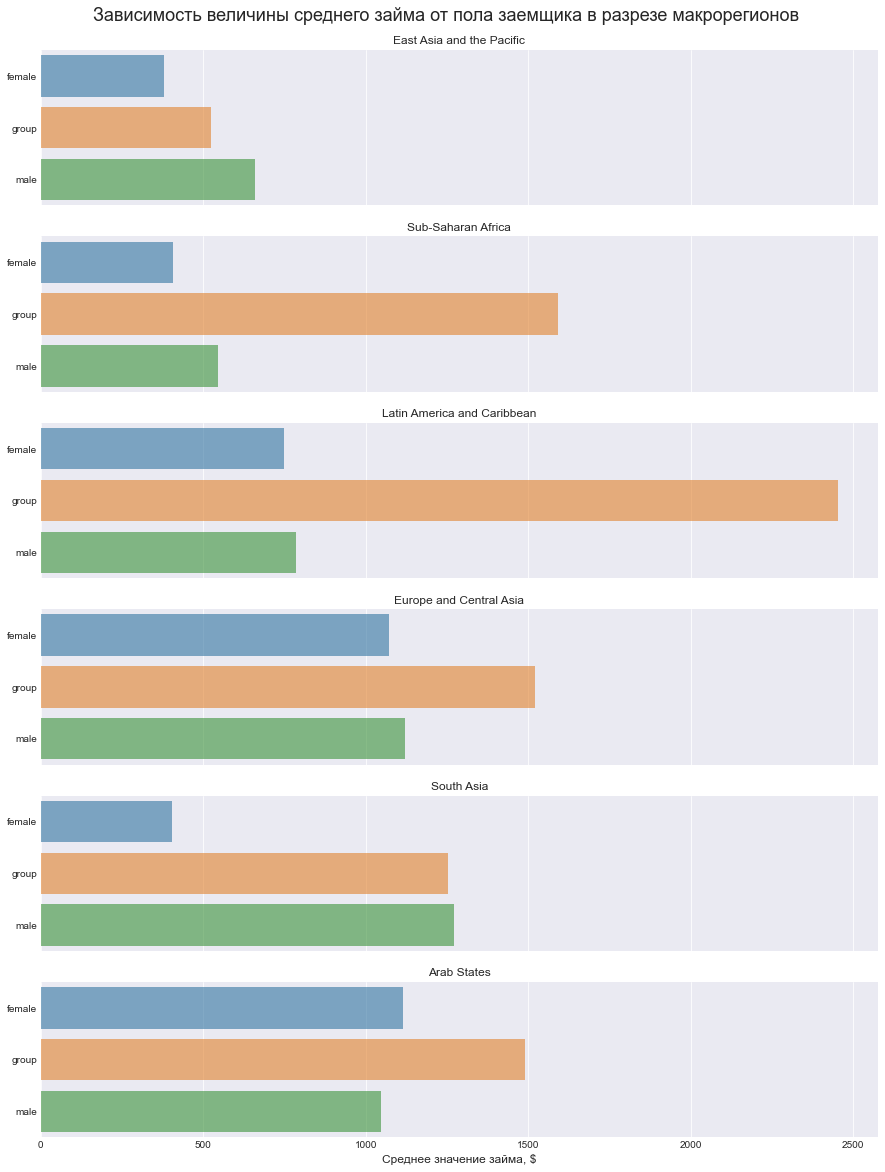

In [23]:
fig, axs = plt.subplots(figsize=(15, 20), nrows=6, sharex=True)

for i, region in enumerate(world_regions):
    ax=axs[i]
    sns.barplot(data=average_loan_by_region_gender[average_loan_by_region_gender['world_region'] == region]\
                , x='loan_amount', y='borrower_genders', ax=ax, alpha=0.6)
    
    ax.set_title(region, fontsize=12)
    ax.set_ylabel('')
    if i == len(world_regions)-1:
        ax.set_xlabel('Среднее значение займа, $', fontsize=12)
    else:
        ax.set_xlabel('')

plt.suptitle('Зависимость величины среднего займа от пола заемщика в разрезе макрорегионов', y=0.91, fontsize=18)
plt.show()

In [24]:
df_kiva_loans.groupby(['world_region', 'borrower_genders']).agg('count')

id  funded_amount  \
world_region                borrower_genders                          
Arab States                 female              3886           3886   
                            group               1402           1402   
                            male                3899           3899   
East Asia and the Pacific   female            165868         165868   
                            group              28419          28419   
                            male               12662          12662   
Europe and Central Asia     female             27470          27470   
                            group                134            134   
                            male               11223          11223   
Latin America and Caribbean female             71740          71740   
                            group              17180          17180   
                            male               44839          44839   
South Asia                  female             33341          33341   
                            group               4347           4347   
                            male                1127           1127   
Sub-Saharan Africa          female             85275          85275   
                            group              35656          35656   
                            male               41972          41972   

                                              loan_amount  activity  sector  \
world_region                borrower_genders                                  
Arab States                 female                   3886      3886    3886   
                            group                    1402      1402    1402   
                            male                     3899      3899    3899   
East Asia and the Pacific   female                 165868    165868  165868   
                            group                   28419     28419   28419   
                            male                    12662     12662   12662   
Europe and Central Asia     female                  27470     27470   27470   
                            group                     134       134     134   
                            male                    11223     11223   11223   
Latin America and Caribbean female                  71740     71740   71740   
                            group                   17180     17180   17180   
                            male                    44839     44839   44839   
South Asia                  female                  33341     33341   33341   
                            group                    4347      4347    4347   
                            male                     1127      1127    1127   
Sub-Saharan Africa          female                  85275     85275   85275   
                            group                   35656     35656   35656   
                            male                    41972     41972   41972   

                                                 use  country_code  country  \
world_region                borrower_genders                                  
Arab States                 female              3886          3886     3886   
                            group               1367          1402     1402   
                            male                3899          3899     3899   
East Asia and the Pacific   female            165868        165868   165868   
                            group              28282         28419    28419   
                            male               12662         12662    12662   
Europe and Central Asia     female             27470         27470    27470   
                            group                 11           134      134   
                            male               11223         11223    11223   
Latin America and Caribbean female             71739         71740    71740   
                            group              15323         17180    17180   
                     

### Вывод по П. 2.4.3
* В Южной Африке и странах Латинской Америки средняя величина займа для групп превышает среднее значение для одиночных заемщиков минимум на 1000\$
* В Южной Азии женщины в среднем занимают меньшие суммы, чем мужчины и группы заемщиков (величина меньше на ~750\$), но количество заемщиков-женщин значительно больше
* В остальных случаях разброс средней величины займа не превышает 500\$

## 4.2. Домашняя работа
***

Расширьте наш отчёт исследованием следующих вопросов:

- Зависимость пола заёмщика от региона планеты, сектора экономики.
- Влияние такого атрибута займа, как **Количество кредиторов** (lender_count), на суммы и сроки займов.
- Влияние показателя **MPI** (многомерный индекс бедности) в разных странах на суммы займов и сроки погашения.
- Зависимости таких метрик, как «Сумма займа», «Срок займа», «Время финансирования заявки», «Ежемесячный платёж», в разрезе **макрорегионов**.

### Зависимость пола заёмщика от региона планеты, сектора экономики

In [25]:
number_of_loans_by_region_gender = df_kiva_loans.groupby(['world_region', 'borrower_genders']).agg('count').reset_index()[['world_region', 'borrower_genders', 'loan_amount']]

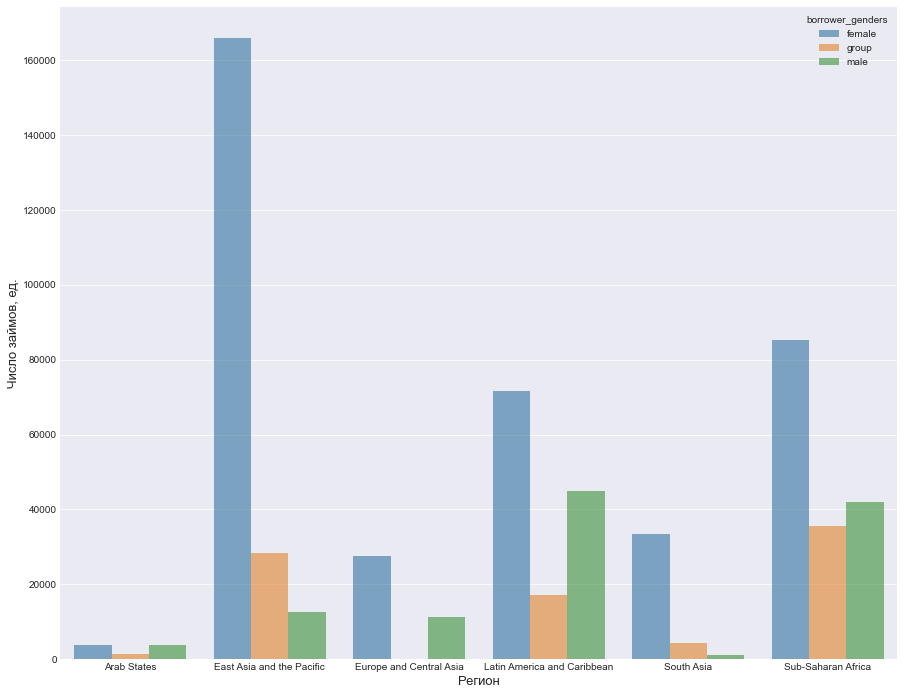

In [26]:
fig, ax = plt.subplots(figsize=(15,12))

sns.barplot(data=number_of_loans_by_region_gender, x='world_region', y='loan_amount', hue='borrower_genders', ax=ax, alpha=0.6)
ax.set_xlabel('Регион', fontsize=13)
ax.set_ylabel('Число займов, ед.', fontsize=13)
plt.show()

In [27]:
number_of_loans_by_sector_gender = df_kiva_loans.groupby(['sector', 'borrower_genders']).agg('count').reset_index()[['sector', 'borrower_genders', 'loan_amount']]

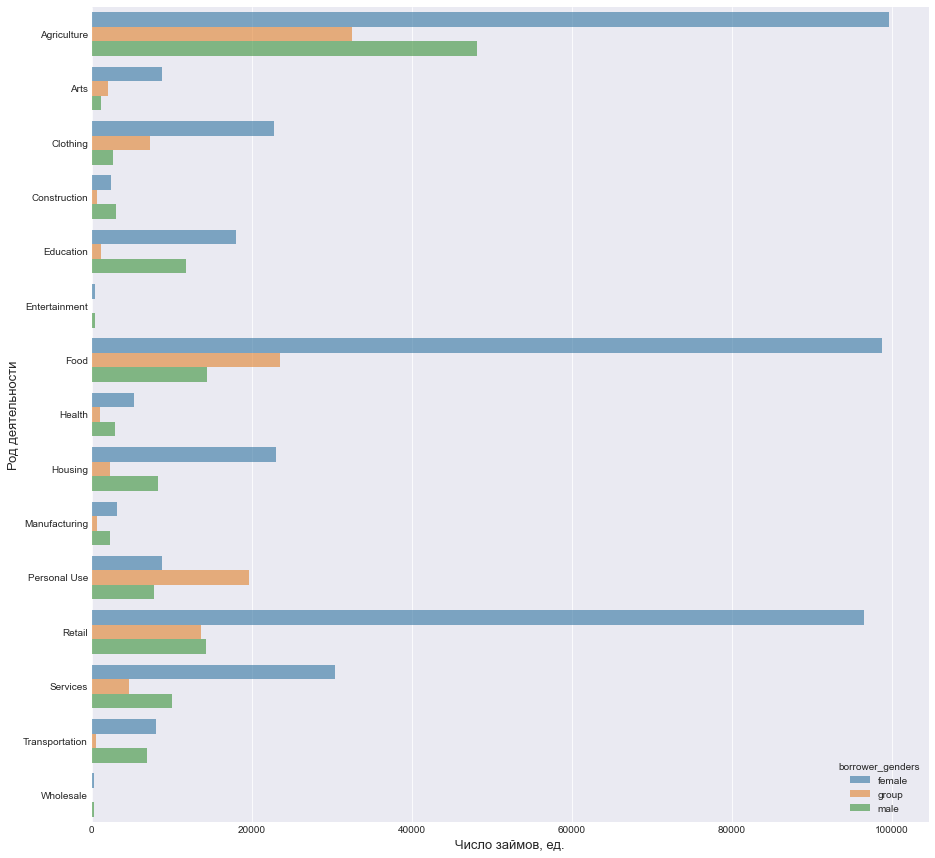

In [28]:
fig, ax = plt.subplots(figsize=(15,15))

sns.barplot(data=number_of_loans_by_sector_gender, y='sector', x='loan_amount', hue='borrower_genders', ax=ax, alpha=0.6)
ax.set_ylabel('Род деятельности', fontsize=13)
ax.set_xlabel('Число займов, ед.', fontsize=13)
plt.show()

* В Арабских странах количество займов, оформленных мужчинами и женщинами примерно равно, в остальных макрорегионах преобладают заемщики-женщины
* В таких областях как строительство и развлечения несущественно выше число заемщиков-мужчин. На личные нужды займы в основном оформляются на группы заемщиков. Во всех остальных секторах займы запрашиваются женщинами, среди всего объема значительное число займов идёт на развитие сельского хозяйства, розничной торговли и сферы питания. 

### Влияние такого атрибута займа, как Количество кредиторов (lender_count), на суммы и сроки займов.

In [29]:
loan_metrics = df_kiva_loans[['loan_amount', 'term_in_months', 'lender_count']]

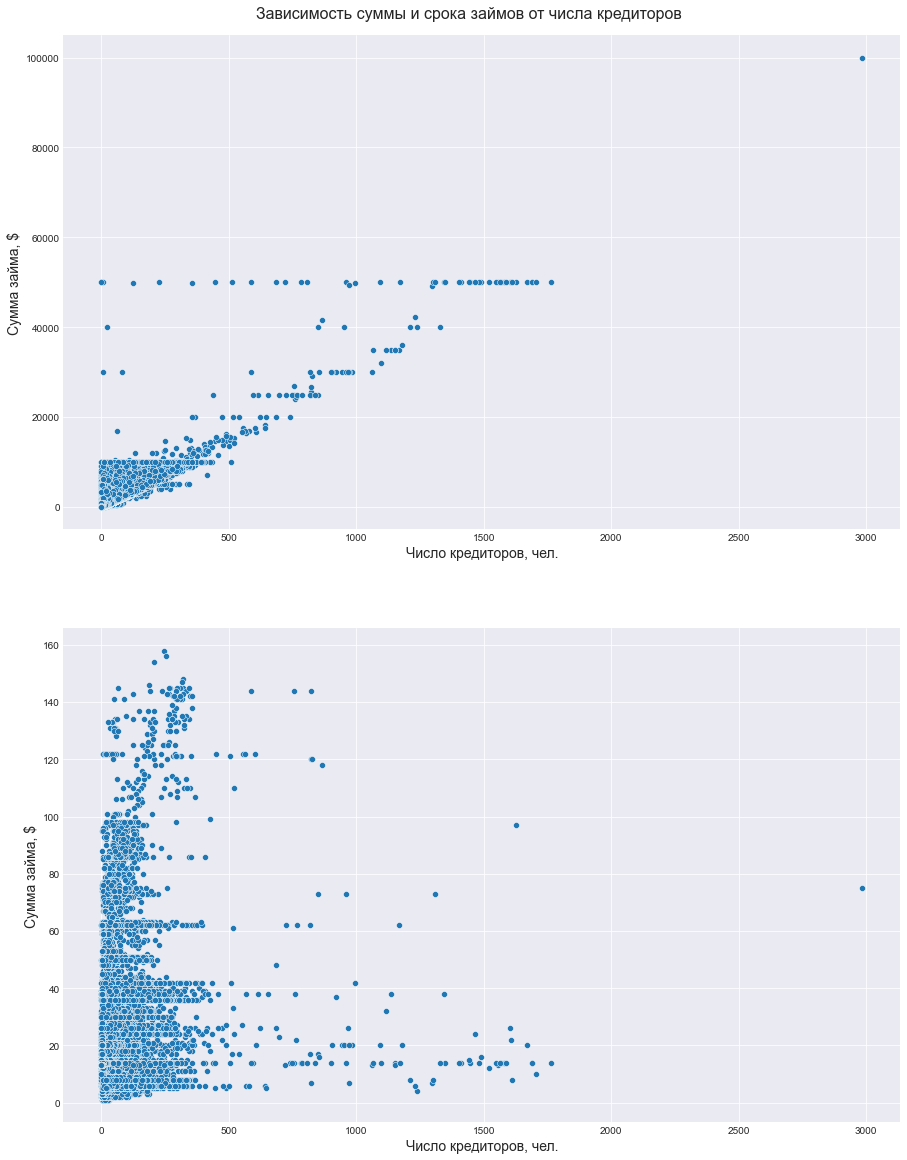

In [30]:
fig, axs = plt.subplots(figsize=(15, 20), ncols=1, nrows=2)

sns.scatterplot(data=loan_metrics, x='lender_count', y='loan_amount', ax=axs[0])

sns.scatterplot(data=loan_metrics, x='lender_count', y='term_in_months', ax=axs[1])

for i in range(2):
    axs[i].set_xlabel('Число кредиторов, чел.', fontsize=14)
    axs[i].set_ylabel('Сумма займа, $', fontsize=14)


plt.suptitle('Зависимость суммы и срока займов от числа кредиторов', y=0.9, fontsize=16)
plt.show()

* Сумма займов имеет прямую зависимость от количества кредиторов
* Время погашения кредита зависит от числа кредиторов вероятнее всего потому, что от их числа зависит и сумма займа, т.е. на погашение большей суммы нужно больше времени.

### Влияние показателя MPI (многомерный индекс бедности) в разных странах на суммы займов и сроки погашения.

In [38]:
loan_metrics_by_mpi = df_kiva_loans[['MPI', 'loan_amount', 'term_in_months']]

D:\Soft\Anaconda\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
D:\Soft\Anaconda\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
D:\Soft\Anaconda\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
D:\Soft\Anaconda\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


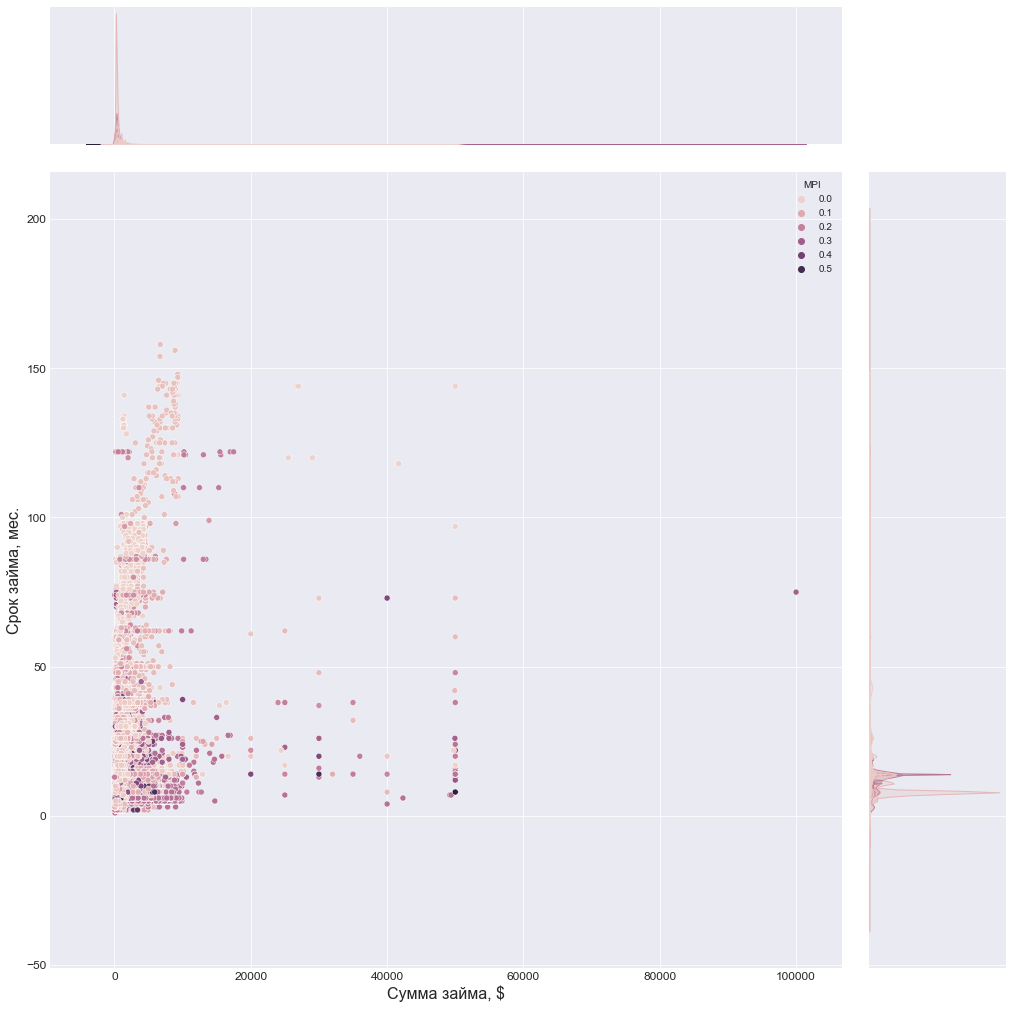

In [42]:
g = sns.jointplot(data=loan_metrics_by_mpi, x='loan_amount', y='term_in_months', hue='MPI', height=14)\
.set_axis_labels('Сумма займа, $', 'Срок займа, мес.', size=16)
g.ax_joint.tick_params(labelsize=12)

plt.show()

* Можно заметить, что прямой зависимости суммы и срока займа от индекса MPI нет.
* Есть некоторая область точек, демонстрирующая, что заемщики из стран с высоким индексом MPI запрашивают бОльшие суммы, но при этом срок погашения займа не так высок, как в случаях с примерно теми же суммами в странах с более низким показателем MPI

In [31]:
df_kiva_loans.head()

,id,funded_amount,loan_amount,activity,sector,use,country_code,country,region,currency,...,funded_time,term_in_months,lender_count,tags,borrower_genders,repayment_interval,date,ISO,world_region,MPI
0,653051,300.0,300.0,Fruits & Vegetables,Food,"To buy seasonal, fresh fruits to sell.",PK,Pakistan,Lahore,PKR,...,2014-01-02 10:06:32+00:00,12.0,12,NaN,female,irregular,2014-01-01,PAK,South Asia,0.233167
1,653053,575.0,575.0,Rickshaw,Transportation,to repair and maintain the auto rickshaw used ...,PK,Pakistan,Lahore,PKR,...,2014-01-02 09:17:23+00:00,11.0,14,NaN,group,irregular,2014-01-01,PAK,South Asia,0.233167
2,653068,150.0,150.0,Transportation,Transportation,To repair their old cycle-van and buy another ...,IN,India,Maynaguri,INR,...,2014-01-01 16:01:36+00:00,43.0,6,"user_favorite, user_favorite",female,bullet,2014-01-01,IND,South Asia,0.000000
3,653063,200.0,200.0,Embroidery,Arts,to purchase an embroidery machine and a variet...,PK,Pakistan,Lahore,PKR,...,2014-01-01 13:00:00+00:00,11.0,8,NaN,female,irregular,2014-01-01,PAK,South Asia,0.233167
4,653084,400.0,400.0,Milk Sales,Food,to purchase one buffalo.,PK,Pakistan,Abdul Hakeem,PKR,...,2014-01-01 19:18:51+00:00,14.0,16,NaN,female,monthly,2014-01-01,PAK,South Asia,0.233167
